### Introduction

#### Read in Data

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

In [239]:
df = pd.read_csv('/Users/kirashen/Desktop/Brown/DATA1030/1030 Mid/data/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [240]:
df.shape

(5110, 12)

#### Drop Useless Columns and Rows

In [241]:
# id is a useless column in this dataset to predict
df.drop('id', axis= 1, inplace= True)

In [242]:
df.shape

(5110, 11)

In [243]:
# Since we know that Hypertension, heart disease and stroke are categorical variables. 
# Thus, we could convert them to object datatype.
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)

In [244]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [245]:
df = df[df.gender != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), object(8)
memory usage: 479.0+ KB


In [246]:
df.shape

(5109, 11)

#### Check and Replace Missing Values

In [247]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [248]:
# Keep missing values and do that later
df['bmi'].fillna(df['bmi'].mode()[0],inplace = True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [249]:
df.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.886905
std,22.613575,45.285004,7.698328
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


### EDA

#### Numerical

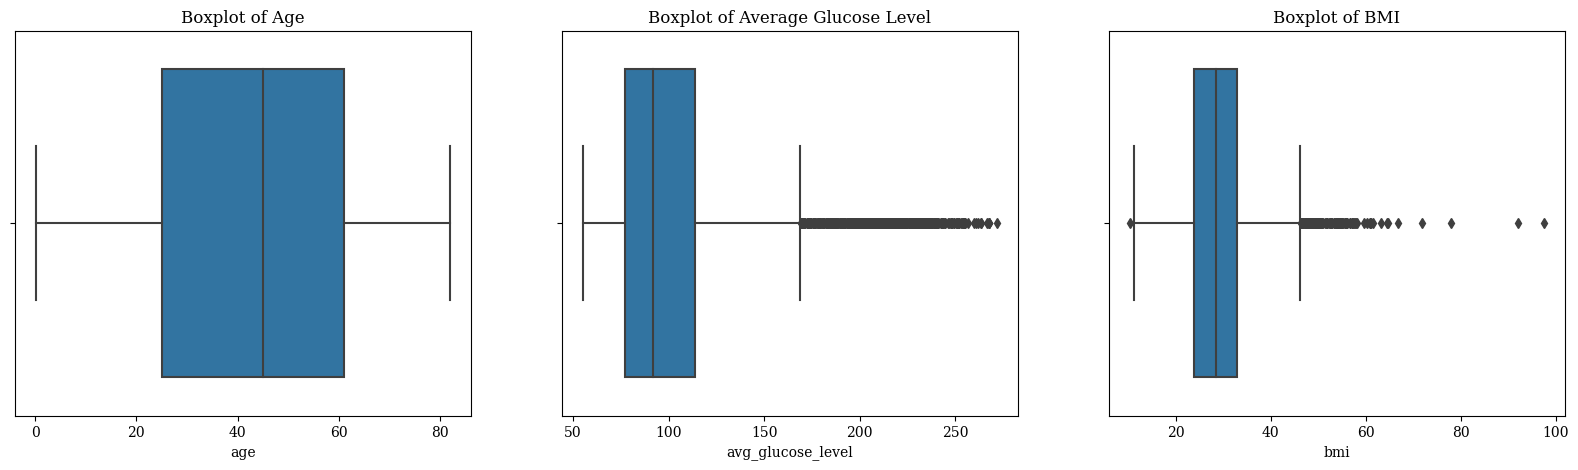

In [225]:
import seaborn as sb
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sb.boxplot(x = df['age'], ax= ax[0]).set(title='Boxplot of Age')
sb.boxplot(x = df['avg_glucose_level'], ax= ax[1]).set(title='Boxplot of Average Glucose Level')
sb.boxplot(x = df['bmi'], ax= ax[2]).set(title='Boxplot of BMI')
plt.savefig("squares.png", dpi=300)
plt.show()

**I noticed that there are a lot of outliers in 'avg_glucose_level' and 'bmi'.**

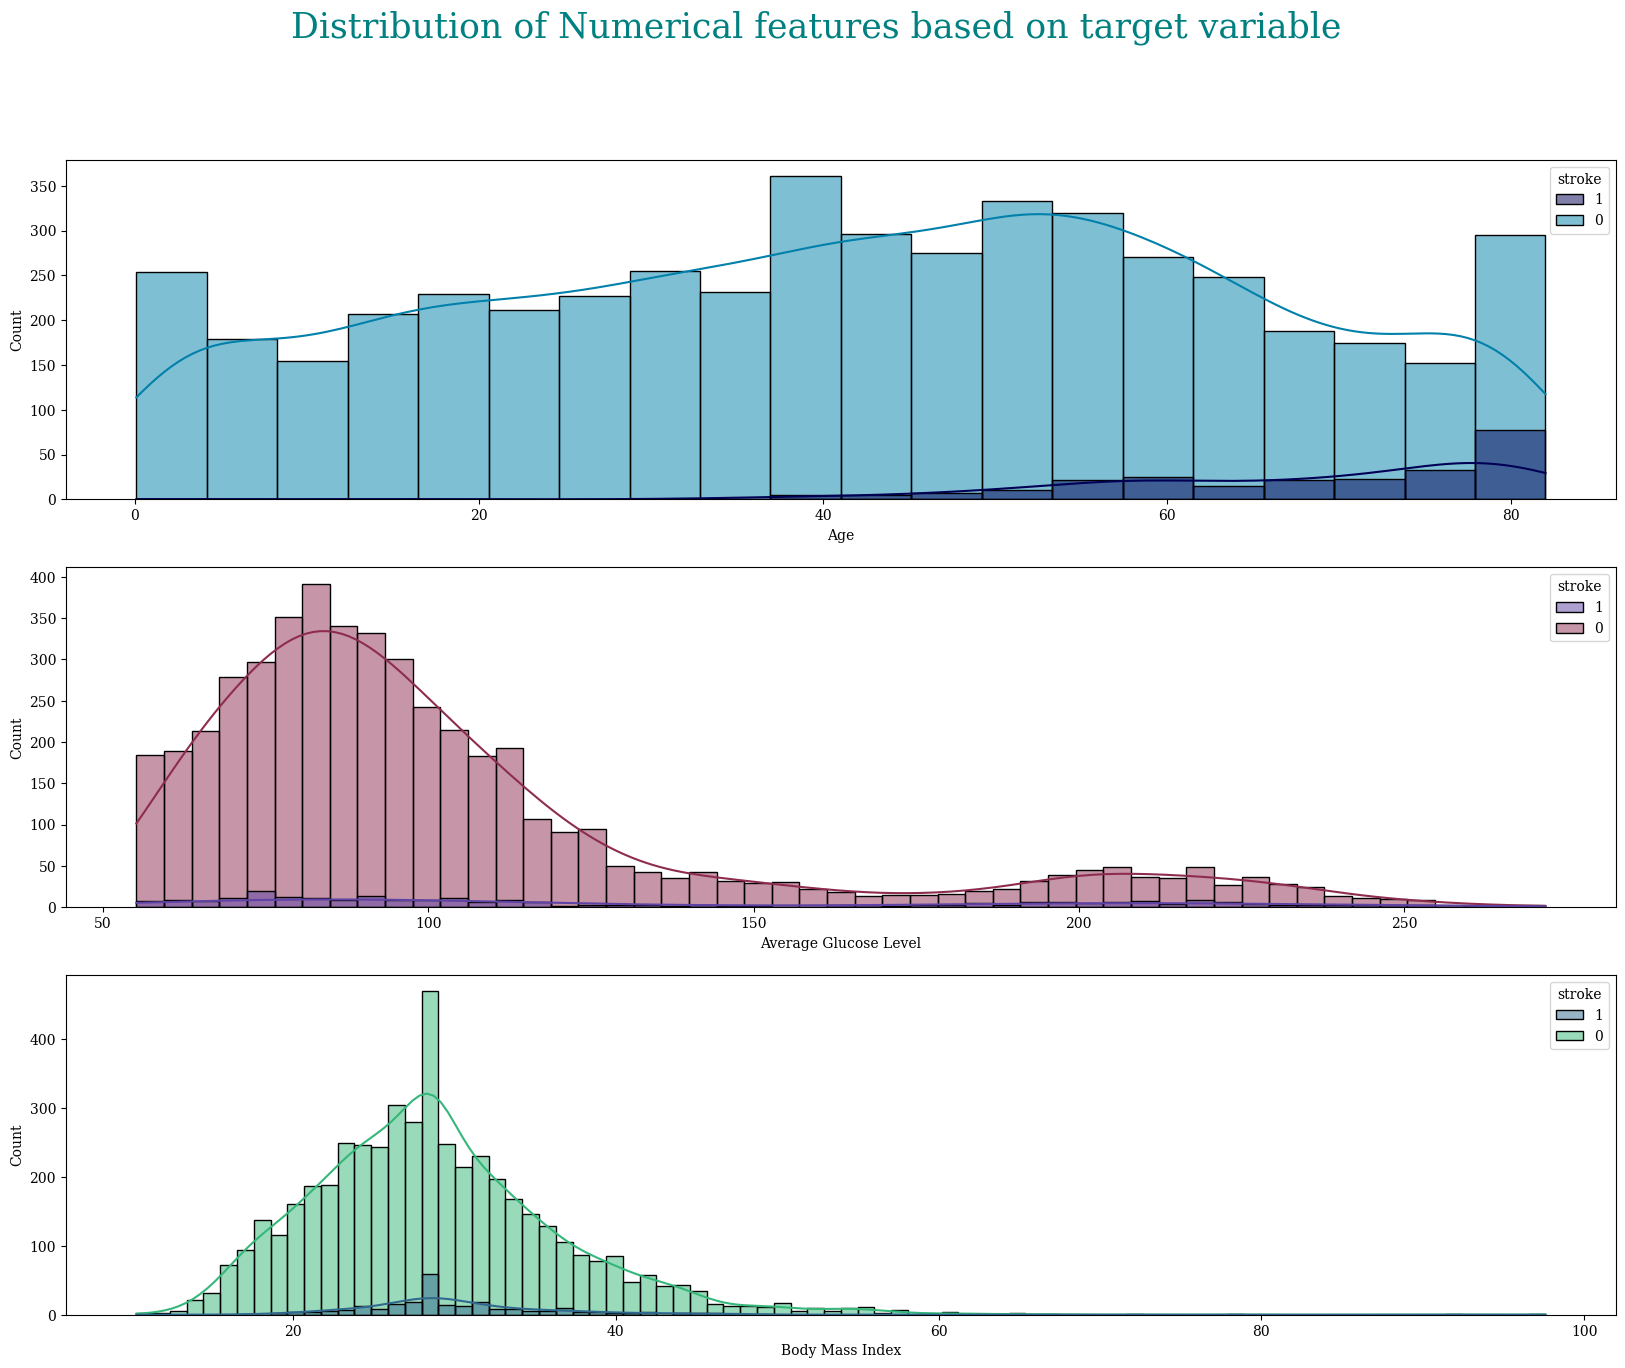

In [226]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Distribution of Numerical features based on target variable', fontsize = 25, color = 'teal')

sb.histplot(x = df['age'], hue= df['stroke'], kde= True, ax= ax[0], palette = 'ocean')
ax[0].set(xlabel = 'Age')

sb.histplot(x = df['avg_glucose_level'], hue= df['stroke'], kde= True, ax= ax[1], palette = 'twilight')
ax[1].set(xlabel = 'Average Glucose Level')

sb.histplot(x = df['bmi'], hue= df['stroke'], kde= True, ax= ax[2], palette = 'viridis')
ax[2].set(xlabel = 'Body Mass Index')

plt.savefig("squares.png", dpi=300)
plt.show()

**We could notice that there exist a pattern in the distribution of Age. </br>
  Older people are more likely to get a stroke compared to younger individuals.**



#### Categorical

In [157]:
df['stroke'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: object>

In [158]:
df['stroke'].value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

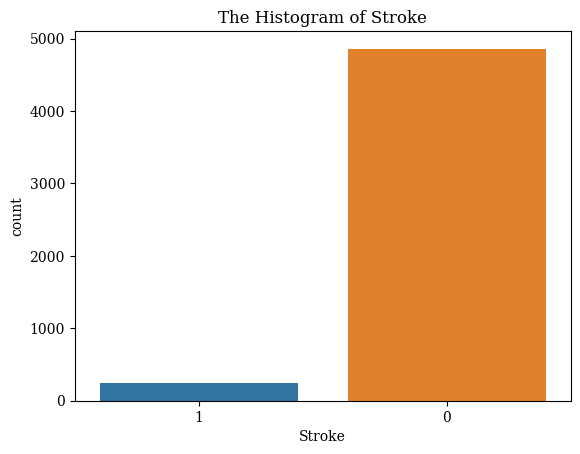

In [159]:
# Strok (Target Variable)
sb.countplot(x = df['stroke']).set(title='The Histogram of Stroke')
plt.xlabel('Stroke')
plt.savefig("squares.png", dpi=300)

**We could notice that people who have stroke are pretty less in this dataset.**

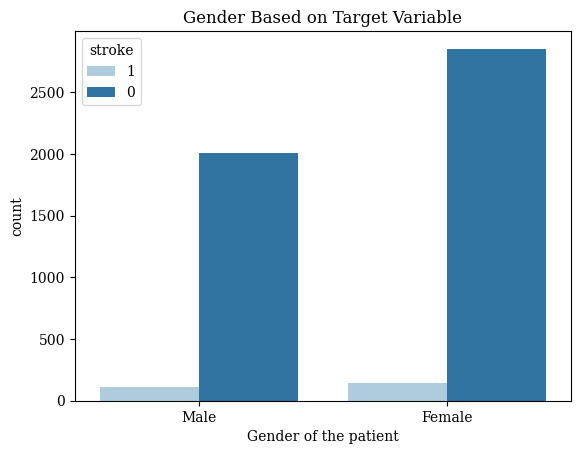

In [160]:
# gender
gender = sb.countplot(x=df['gender'], hue=df['stroke'], palette="Paired")
gender.set(xlabel = 'Gender of the patient')
gender.set(title='Gender Based on Target Variable')
plt.savefig("squares.png", dpi=300)

<Figure size 500x300 with 0 Axes>

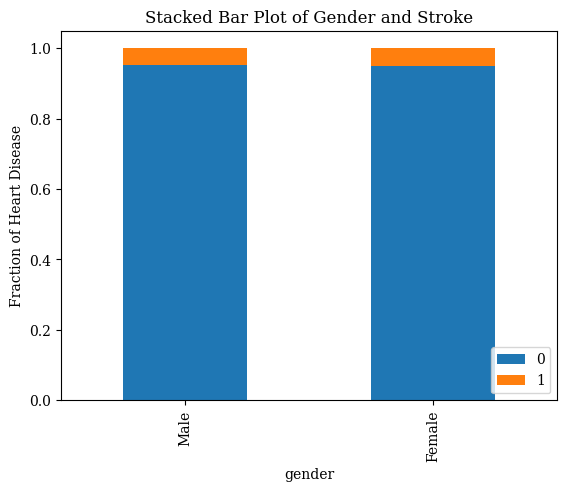

In [161]:
# Stacked Hist
count_matrix = df.groupby(['gender', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.xticks([0,1], ['Male', 'Female'])
plt.title("Stacked Bar Plot of Gender and Stroke")
plt.ylabel('Fraction of Heart Disease')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

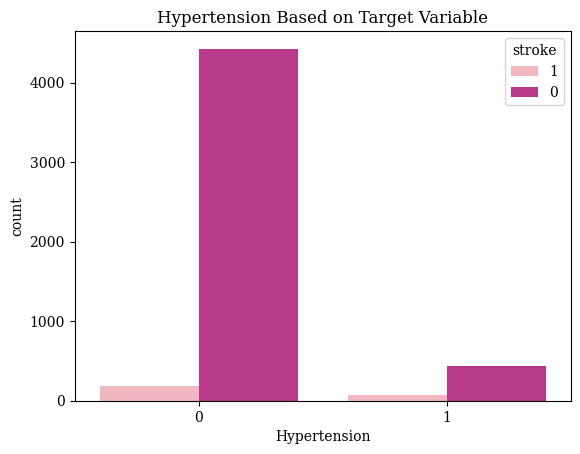

In [162]:
# Hypertension
hypertension = sb.countplot(x=df['hypertension'], hue=df['stroke'], palette="RdPu")
hypertension.set(xlabel = 'Hypertension')
hypertension.set(title='Hypertension Based on Target Variable')
plt.savefig("squares.png", dpi=300)

<Figure size 500x300 with 0 Axes>

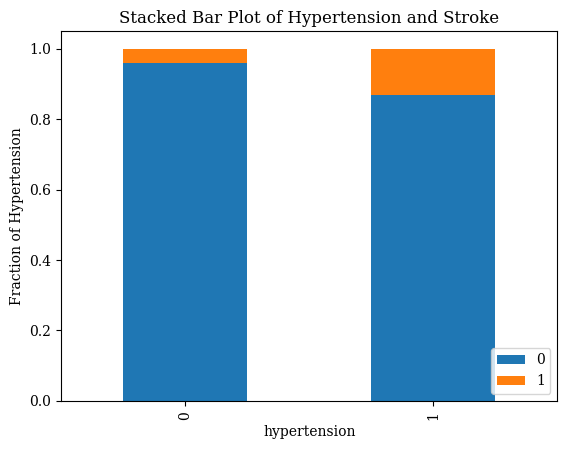

In [163]:
# Stacked Hist
count_matrix = df.groupby(['hypertension', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Hypertension and Stroke")
plt.ylabel('Fraction of Hypertension')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

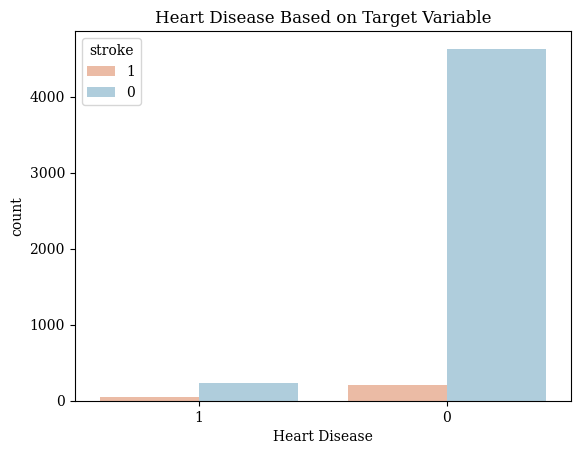

In [164]:
# Heart Disease
heart_disease = sb.countplot(x=df['heart_disease'], hue=df['stroke'], palette= 'RdBu')
heart_disease.set(xlabel = 'Heart Disease')
heart_disease.set(title='Heart Disease Based on Target Variable')
plt.savefig("squares.png", dpi=300)

<Figure size 500x300 with 0 Axes>

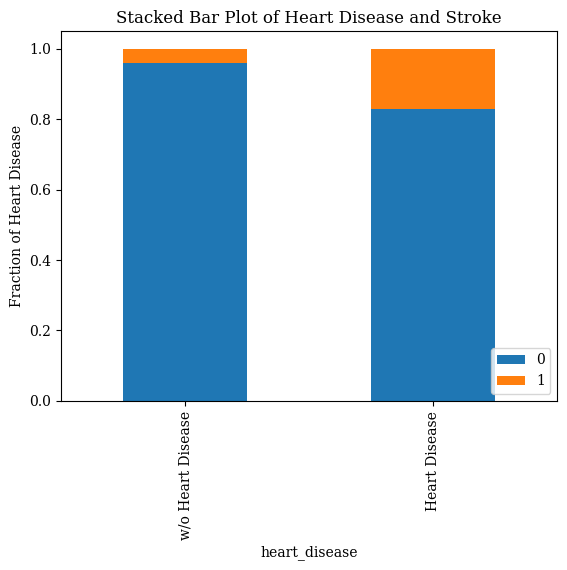

In [165]:
# Stacked Hist
count_matrix = df.groupby(['heart_disease', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.xticks([0,1], ['w/o Heart Disease', 'Heart Disease'])
plt.title("Stacked Bar Plot of Heart Disease and Stroke")
plt.ylabel('Fraction of Heart Disease')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

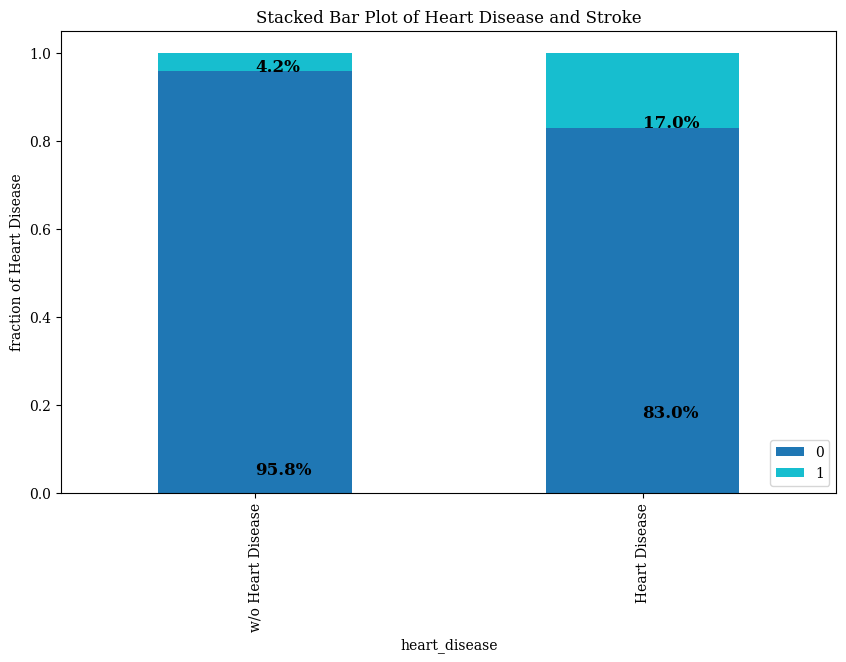

In [166]:
cross_tab_prop = pd.crosstab(index=df['heart_disease'],
                             columns=df['stroke'],
                             normalize="index")
cross_tab_prop

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

for n, x in enumerate([*cross_tab_prop.index.values]):
    for proportion in cross_tab_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round((1-proportion) * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.xticks([0,1], ['w/o Heart Disease', 'Heart Disease'])
plt.title("Stacked Bar Plot of Heart Disease and Stroke")
plt.ylabel('fraction of Heart Disease')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

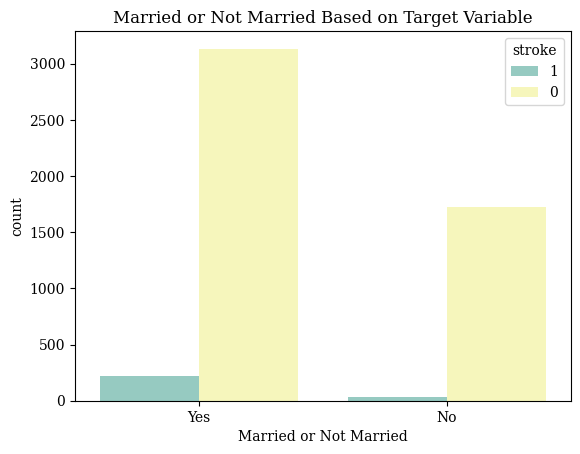

In [167]:
# ever_married
ever_married = sb.countplot(x=df['ever_married'], hue=df['stroke'], palette= 'Set3')
ever_married.set(xlabel = 'Married or Not Married')
ever_married.set(title='Married or Not Married Based on Target Variable')
plt.savefig("squares.png", dpi=300)

<Figure size 500x300 with 0 Axes>

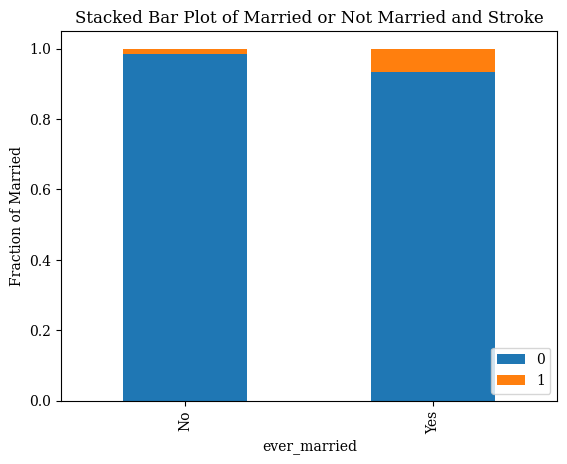

In [168]:
# Stacked Hist
count_matrix = df.groupby(['ever_married', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Married or Not Married and Stroke")
plt.ylabel('Fraction of Married')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

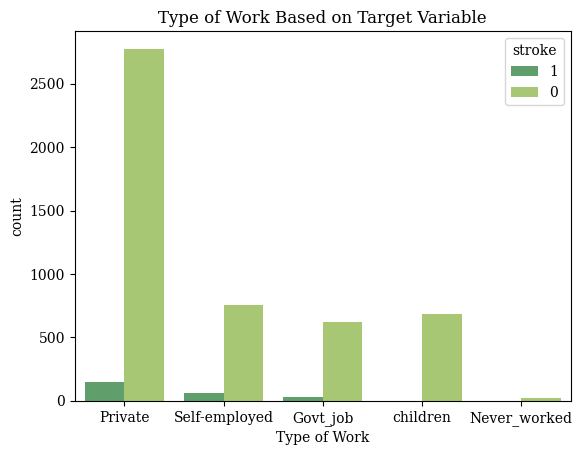

In [169]:
# work_type
work_type = sb.countplot(x=df['work_type'], hue=df['stroke'], palette= 'summer')
work_type.set(xlabel = 'Type of Work')
work_type.set(title='Type of Work Based on Target Variable')
plt.savefig("squares.png", dpi=300)

<Figure size 500x300 with 0 Axes>

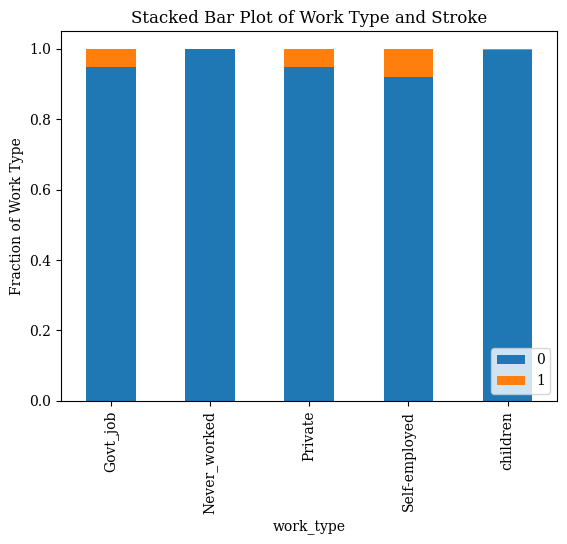

In [170]:
# Stacked Hist
count_matrix = df.groupby(['work_type', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Work Type and Stroke")
plt.ylabel('Fraction of Work Type')
plt.legend(loc=4)
plt.savefig("squares.png", dpi=300)
plt.show()

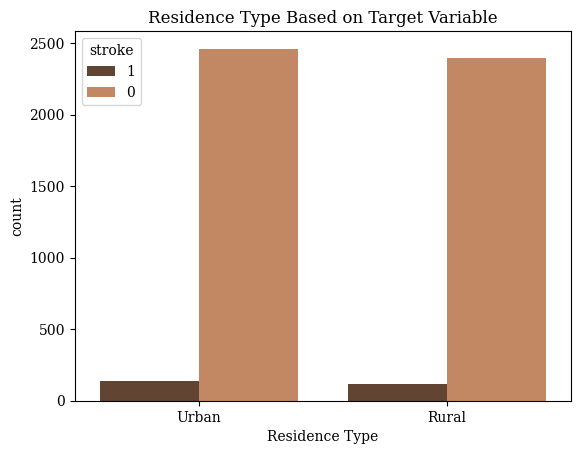

In [171]:
# Residence_type
Residence_type = sb.countplot(x=df['Residence_type'], hue=df['stroke'], palette= 'copper')
Residence_type.set(xlabel = 'Residence Type')
Residence_type.set(title='Residence Type Based on Target Variable')
plt.savefig("RedidenceType_BarPlot.png", dpi=300)

<Figure size 500x300 with 0 Axes>

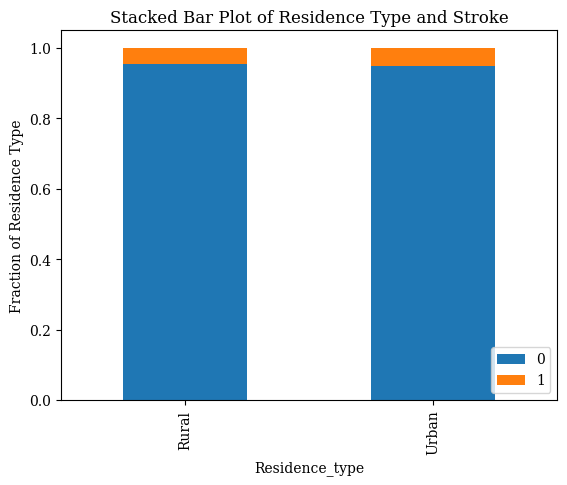

In [172]:
# Stacked Hist
count_matrix = df.groupby(['Residence_type', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Residence Type and Stroke")
plt.ylabel('Fraction of Residence Type')
plt.legend(loc=4)
plt.savefig("RedidenceType_Stacked.png", dpi=300)
plt.show()

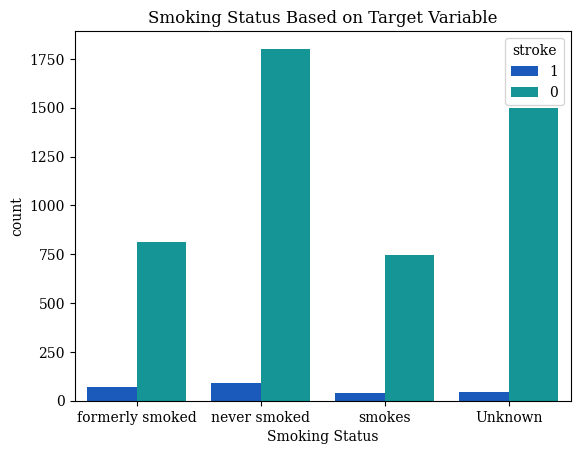

In [173]:
# smoking_status
smoking_status = sb.countplot(x=df['smoking_status'], hue=df['stroke'], palette= 'winter')
smoking_status.set(xlabel = 'Smoking Status')
smoking_status.set(title='Smoking Status Based on Target Variable')
plt.savefig("SmokingStatus_BarPlot.png", dpi=300)

<Figure size 500x300 with 0 Axes>

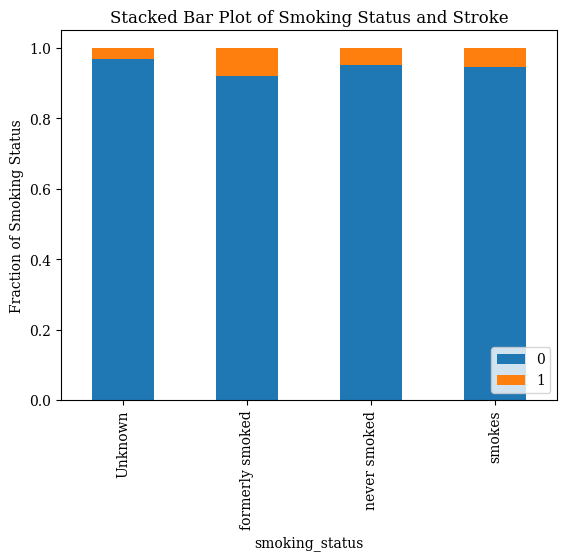

In [174]:
# Stacked Hist
count_matrix = df.groupby(['smoking_status', 'stroke']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot of Smoking Status and Stroke")
plt.ylabel('Fraction of Smoking Status')
plt.legend(loc=4)
plt.savefig("Smoking Status_Stacked.png", dpi=300)
plt.show()

In [272]:
# sb.histplot(data=df, x='bmi', hue='stroke', multiple='stack')
# plt.title("Histogram of Stroke Based on BMI")
# plt.savefig("BmiStroke_Histogram.png", dpi=300)
# plt.show()

#### Spliting

In [261]:
y = df["stroke"]
X = df.loc[:,(df.columns != "stroke")]
print(y.value_counts())

0    4860
1     249
Name: stroke, dtype: int64


In [262]:
from sklearn.model_selection import train_test_split 

random_state = 42

# Imbalanced
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('**balance without stratification:**')
# a variation on the order of 1% which would be too much for imbalanced data!
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, stratify=y, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, stratify=y_other, random_state=random_state)

print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

print('-'*65)
print(X_train.head())
print('-'*65)
print(X_val.head())
print('-'*65)
print(X_test.head())

# print("X_train" , X_train.head())
# print("y_train" , y_train.head())
# print("X_val" , X_val.head())
# print("y_val" , y_val.head())
# print("X_test" ,X_test.head())
# print("y_test" , y_test.head())

**balance without stratification:**
(array(['0', '1'], dtype=object), array([2930,  135]))
(array(['0', '1'], dtype=object), array([972,  50]))
(array(['0', '1'], dtype=object), array([958,  64]))
**balance with stratification:**
(array(['0', '1'], dtype=object), array([2916,  149]))
(array(['0', '1'], dtype=object), array([972,  50]))
(array(['0', '1'], dtype=object), array([972,  50]))
-----------------------------------------------------------------
      gender   age hypertension heart_disease ever_married      work_type  \
3136    Male  36.0            0             0          Yes        Private   
4847  Female  30.0            0             0          Yes        Private   
1438    Male  47.0            0             0          Yes        Private   
3991  Female  57.0            0             0          Yes        Private   
4183  Female  67.0            0             0          Yes  Self-employed   

     Residence_type  avg_glucose_level   bmi smoking_status  
3136          Rura

#### Encoding

In [263]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [264]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

# OneHotEncoder - converts categorical features into dummy arrays
onehot_ftrs = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
# StandardScaler - standardizes continuous features by removing the mean and scaling to unit variance
std_ftrs = ['bmi', 'avg_glucose_level', 'age']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('one-hot', categorical_transformer, onehot_ftrs),
        ('scaler', numeric_transformer, std_ftrs)])

In [265]:
# transform the train
X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
# print(X_train.shape)
print(df_train.shape)

# transform the val
X_val_prep = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_val.shape)

# transform the test
X_test_prep = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)

(3065, 22)
(1022, 22)
(1022, 22)


#### F-test

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
np.random.seed(10)

f_test, p_values = f_classif(X_prep, y_train)
mi = mutual_info_classif(X_prep, y_train)

for i in range(len(X_train.columns)):
    print(X_train.columns[i],"--",("F-score={:.2f}, MI={:.2f}".format(f_test[i], mi[i])))
    #print(X_train.columns[i],'--','f score:',str(f_test[i]))

gender -- F-score=0.01, MI=0.00
age -- F-score=0.01, MI=0.00
hypertension -- F-score=56.62, MI=0.00
heart_disease -- F-score=56.62, MI=0.00
ever_married -- F-score=64.26, MI=0.01
work_type -- F-score=64.26, MI=0.01
Residence_type -- F-score=43.85, MI=0.00
avg_glucose_level -- F-score=43.85, MI=0.01
bmi -- F-score=1.04, MI=0.00
smoking_status -- F-score=0.67, MI=0.00


[206.71460593  64.2629109   64.2629109   56.62013164  56.62013164]


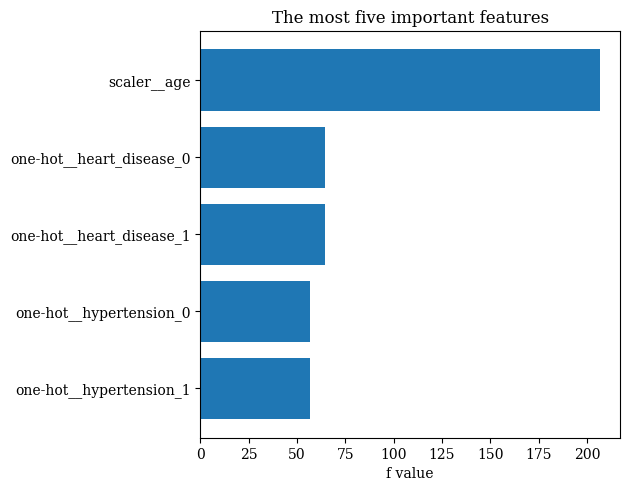

In [270]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

feature_names = preprocessor.get_feature_names_out()
feature_names = np.array(feature_names)

f_test, p_values = f_classif(X_prep, y_train)
indices = np.argsort(f_test)[::-1]
print(f_test[indices[:5]])

plt.barh(np.arange(len(indices[:5])),f_test[indices[:5]] )
plt.gca().invert_yaxis()
plt.yticks(ticks = np.arange(len(indices[:5]),dtype=int),labels = feature_names[indices[:5]])
plt.xlabel('f value')
plt.tight_layout()
plt.title('The most five important features')
plt.savefig("F-test.png", dpi=300)
plt.show()

#### Correlation (Personal Check)

In [363]:
# corr = df_train.corr()
# corr.head()

In [364]:
# df1 = corr.rename(columns={'one-hot__gender_Female':'gender_F',
#                            'one-hot__gender_Male':'gender_M',
#                            'one-hot__hypertension_0':'hypertension_0',
#                            'one-hot__hypertension_1':'hypertension_1',
#                            'one-hot__heart_disease_0':'heart_disease_0',
#                            'one-hot__heart_disease_1':'heart_disease_1',
#                            'one-hot__ever_married_No':'ever_married_No',
#                            'one-hot__ever_married_Yes':'ever_married_Yes',
#                            'one-hot__work_type_Govt_job':'work_type_Govt_job',
#                            'one-hot__work_type_Never_worked':'work_type_Never_worked',
#                            'one-hot__work_type_Private':'work_type_Private',
#                            'one-hot__work_type_Self-employed':'work_type_Self-employed',
#                            'one-hot__work_type_children':'work_type_children',
#                            'one-hot__Residence_type_Rural':'Residence_type_Rural',
#                            'one-hot__Residence_type_Urban':'Residence_type_Urban',
#                            'one-hot__smoking_status_Unknown':'smoking_status_Unknown',
#                            'one-hot__smoking_status_formerly smoked':'smoking_status_formerly smoked',
#                            'one-hot__smoking_status_never smoked':'smoking_status_never smoked',
#                            'one-hot__smoking_status_smokes':'smoking_status_smokes',
#                            'scaler__bmi':'bmi',
#                            'scaler__avg_glucose_level':'avg_glucose_level',
#                            'scaler__age':'age'},
#                      index={'one-hot__gender_Female':'gender_F',
#                            'one-hot__gender_Male':'gender_M',
#                            'one-hot__hypertension_0':'hypertension_0',
#                            'one-hot__hypertension_1':'hypertension_1',
#                            'one-hot__heart_disease_0':'heart_disease_0',
#                            'one-hot__heart_disease_1':'heart_disease_1',
#                            'one-hot__ever_married_No':'ever_married_No',
#                            'one-hot__ever_married_Yes':'ever_married_Yes',
#                            'one-hot__work_type_Govt_job':'work_type_Govt_job',
#                            'one-hot__work_type_Never_worked':'work_type_Never_worked',
#                            'one-hot__work_type_Private':'work_type_Private',
#                            'one-hot__work_type_Self-employed':'work_type_Self-employed',
#                            'one-hot__work_type_children':'work_type_children',
#                            'one-hot__Residence_type_Rural':'Residence_type_Rural',
#                            'one-hot__Residence_type_Urban':'Residence_type_Urban',
#                            'one-hot__smoking_status_Unknown':'smoking_status_Unknown',
#                            'one-hot__smoking_status_formerly smoked':'smoking_status_formerly smoked',
#                            'one-hot__smoking_status_never smoked':'smoking_status_never smoked',
#                            'one-hot__smoking_status_smokes':'smoking_status_smokes',
#                            'scaler__bmi':'bmi',
#                            'scaler__avg_glucose_level':'avg_glucose_level',
#                            'scaler__age':'age'})

In [365]:
# mask = np.triu(df1)
# heatmap_corr = sb.heatmap(df1,cbar=True, square=True, annot=False, cmap="Blues", mask=mask)
# heatmap_corr.set(title='Corrlation of features')